In [1]:
from experiments.rules_vs_exemplars.transformer_classification import TransformerClassifier
from experiments.rules_vs_exemplars.config import TransformerConfig
from experiments.rules_vs_exemplars.rules_exemplars import SequenceDataGen
from torchviz import make_dot
import torch

In [3]:
# generate some example data
generator = SequenceDataGen(covariance_scale=0.)
config = TransformerConfig(token_dim=64, h_dim=64, log_to_wandb=True, n_blocks=1, n_heads=4, batch_size=32,
                           max_T=64)
model = TransformerClassifier(config=config)

# generate data
stim_sequence, labels_sequence, query_stimuli, query_labels = \
    generator.generate_stimuli_few_shot_random_context(n_reps=4, batch_size=config.batch_size)

# convert to torch tensors
stimuli_sequence = torch.from_numpy(stim_sequence).float()
labels_sequence = torch.from_numpy(labels_sequence).long()
query_stimuli = torch.from_numpy(query_stimuli).float()
query_labels = torch.from_numpy(query_labels).long()

# append query stimulus to stimuli_sequence
stimuli_sequence = torch.cat([stimuli_sequence, query_stimuli.unsqueeze(1)], dim=1)


In [4]:
print(model)

TransformerClassifier(
  (proj_token): Embedding(64, 64)
  (proj_stim): Linear(in_features=64, out_features=64, bias=True)
  (embed_timesteps): Embedding(64, 64)
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Sequential(
    (0): Block(
      (attention): MaskedCausalAttention(
        (q_net): Linear(in_features=64, out_features=64, bias=True)
        (k_net): Linear(in_features=64, out_features=64, bias=True)
        (v_net): Linear(in_features=64, out_features=64, bias=True)
        (proj_net): Linear(in_features=64, out_features=64, bias=True)
        (att_drop): Dropout(p=0.1, inplace=False)
        (proj_drop): Dropout(p=0.1, inplace=False)
      )
      (mlp): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): L

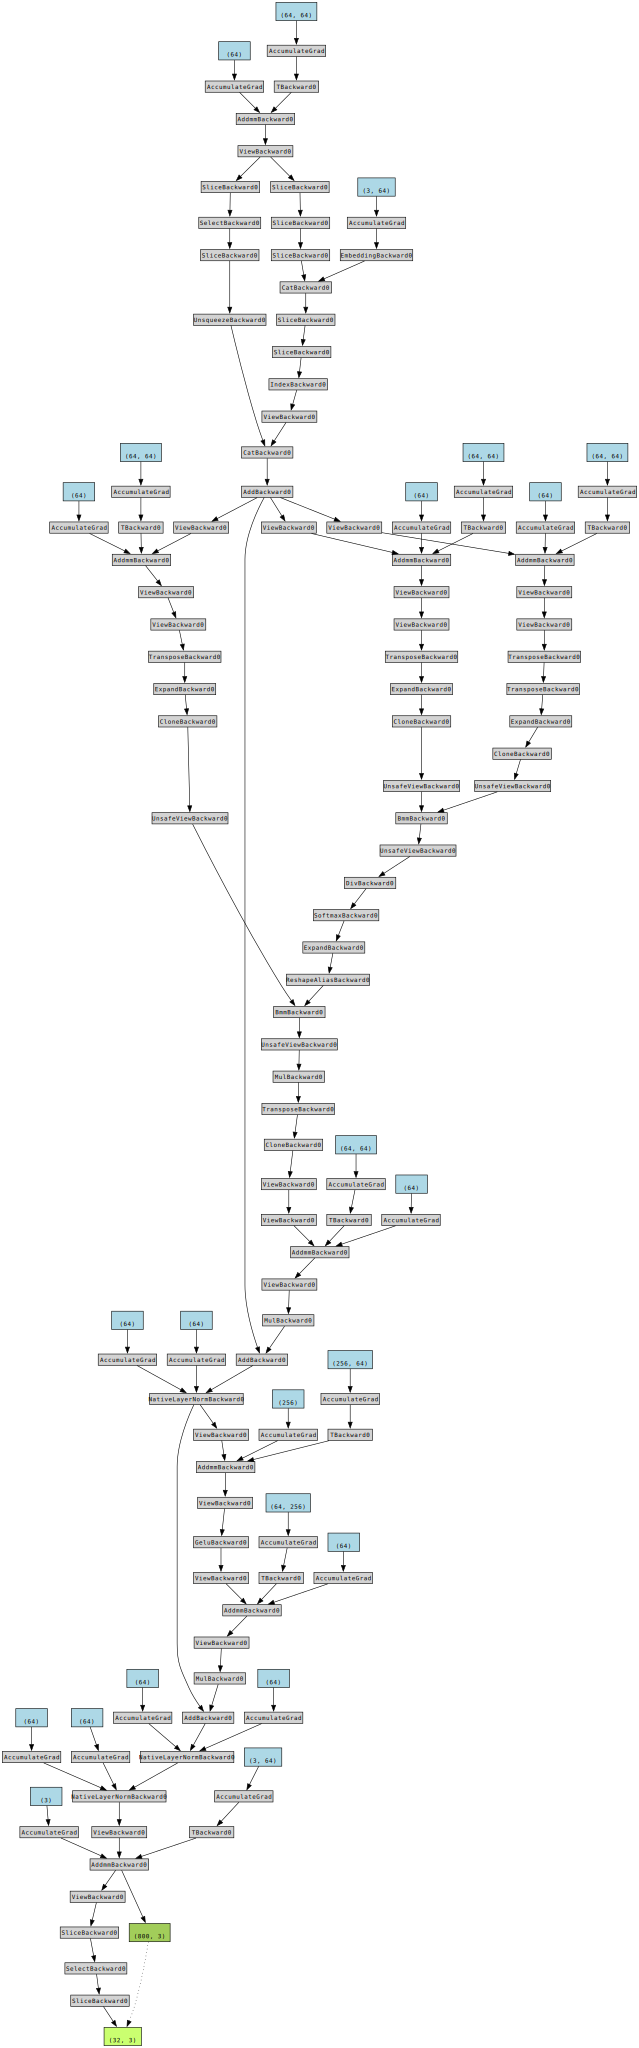

In [5]:
make_dot(model(stimuli_sequence, labels_sequence))